In [ ]:
# Install pyTorch after giving write permissions for anaconda

In [5]:
! pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/45.3 MB 1.3 MB/s eta 0:00:35
   ---------------------------------------- 0.2/45.3 MB 1.5 MB/s eta 0:00:31
   ---------------------------------------- 0.3/45.3 MB 1.8 MB/s eta 0:00:26
   ---------------------------------------- 0.4/45.3 MB 1.8 MB/s eta 0:00:25
   ---------------------------------------- 0.5/45.3 MB 1.9 MB/s eta 0:00:24
    --------------------------------------- 0.6/45.3 MB 1.9 MB/s eta 0:00:24
    --------------------------------------- 0.7/45.3 MB 1.9 MB/s eta 0:00:23
    --

In [202]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import make_grid

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import argparse
import imutils
import cv2
import os

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
adapt                         0.4.4
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrit

In [3]:
!pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=2634ec0f60b875a32f42e23eff125be2d06715397eeaf0a94522312a97b8939f
  Stored in directory: c:\users\sanja\appdata\local\pip\cache\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


In [12]:
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True, help="path to input dataset of faces")
ap.add_argument("-m", "--model", required=True, help="path to output model")
args = vars(ap.parse_args())

# initialize the list of data and labels
data = []
labels = []

usage: ipykernel_launcher.py [-h] -d DATASET -m MODEL
ipykernel_launcher.py: error: the following arguments are required: -d/--dataset, -m/--model


SystemExit: 2

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [183]:
data = []
labels = []

In [ ]:
transform = transforms.Compose(
    [transforms.Resize([28, 28]),
     transforms.RandomCrop(224),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor()])
data = datasets.ImageFolder(root=root_path + dir`, transform=transform)

In [185]:
convert_tensor = transforms.Compose(
    [#transforms.Resize([28, 28]),
    transforms.ToTensor()])

In [186]:
# Processing every image
for imagePath in sorted(list(paths.list_images("E:\CS projects\Smile Detection\SMILEsmileD-master\SMILEs"))):
    # Load the image, pre-process it, and store it in the data variabele created above
    image = cv2.imread(imagePath)                    #Load the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #Convert image to grayscale
    image = imutils.resize(image, width=28)          #Resize image to a fixed size of 28x28 pixels
    image = convert_tensor(image)                    #Check WHAT THIS IS???
    #image = image/255                               # scale the raw pixel intensities to the range [0, 1]
    data.append(image)
    
    #Extracting labels based on the folder the image is stored in
    label = imagePath.split(os.path.sep)[-3]
    label = 1 if label == "positives" else 
    labels.append(label) 


In [187]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [194]:
labels_encoded = pd.get_dummies(labels)
labels_encoded.head()

,0,1
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [214]:
labels[10000]

1

In [230]:
from sklearn.preprocessing import LabelEncoder
 
encoder = LabelEncoder()
encoder.fit(labels)
y = encoder.transform(labels)

In [231]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [232]:
print(encoder.classes_)

[0 1]


In [233]:
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [239]:
y[0].shape

torch.Size([1])

In [226]:
labelsT[0].view(1,1,1)

RuntimeError: shape '[1, 1, 1]' is invalid for input of size 0

In [223]:
data[0].shape

torch.Size([1, 28, 28])

In [461]:
# calculate the total number of training images in each class and
# initialize a dictionary to store the class weights
classTotals = labels_encoded.sum()
classWeight = dict()
# loop over all classes and calculate the class weight
for i in range(0, len(classTotals)): classWeight[i] = classTotals.max() / classTotals[i]

In [499]:
print(classTotals)
classWeightTuple = classWeight[0],classWeight[1]
classWeightList = list(classWeightTuple)
print(classWeightList)
classWeightTensor = torch.Tensor(classWeightList)
#t1 = torch.Tensor(1)
#t2 = torch.Tensor(2.56775)

0    9475
1    3690
dtype: int64
[1.0, 2.567750677506775]


In [504]:
(X_train, X_test, y_train, y_test) = train_test_split(data,labels, test_size=0.20, stratify=labels, random_state=42)

In [505]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully Connected Layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2

    # Re-View to flatten it out
    X = X.view(-1, 16*5*5) # negative one so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [506]:
xtr1 = X_train[0]
xtr1.shape

torch.Size([1, 28, 28])

In [507]:
xtr1 = xtr1.view(1,1,28,28)

In [508]:
conv1 = nn.Conv2d(1,6,3,1)

In [509]:
xtr1 = F.relu(conv1(xtr1))

In [510]:
xtr1 = F.max_pool2d(xtr1,2,2)

In [511]:
xtr1.shape

torch.Size([1, 6, 13, 13])

In [512]:
# Create an Instance of our Model
# torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [513]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss(weight=classWeightTensor)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005) # Smaller the Learning Rate, longer its gonna take to train.

In [514]:
train_data = list(zip(X_train,y_train))
test_data = list(zip(X_test,y_test))

In [515]:
train_loader = data_utils.DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [516]:
import time
start_time = time.time()

# Create Variables To Tracks Things
epochs = 15
train_losses = []
test_losses = []
train_correct = []
test_correct = []
num_total_train = []
num_total_test = []

# For Loop of Epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    num_train = 0
    num_test = 0


    # Train
    for b,(X_train, y_train) in enumerate(train_loader):
        b+=1 # start our batches at 1
        y_pred = model(X_train) # get predicted values from the training set. Not flattened 2D
        loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train

        predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
        batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False=0, sum those up
        trn_corr += batch_corr # keep track as we go along in training.
        num_train += len(y_train)

        # Update our parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        # Print out some results
        if b%200 == 0:
            print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

    train_losses.append(loss)
    train_correct.append(trn_corr)
    num_total_train.append(num_train)


    # Test
    with torch.no_grad(): #No gradient so we don't update our weights and biases with test data
        for b,(X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
            tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away
            num_test += len(y_test)

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    num_total_test.append(num_test)
    

current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 200  Loss: 0.4539293050765991
Epoch: 0  Batch: 400  Loss: 0.3034397065639496
Epoch: 0  Batch: 600  Loss: 0.12860815227031708
Epoch: 0  Batch: 800  Loss: 0.22551441192626953
Epoch: 0  Batch: 1000  Loss: 0.8575980067253113
Epoch: 1  Batch: 200  Loss: 0.7252928614616394
Epoch: 1  Batch: 400  Loss: 0.6815601587295532
Epoch: 1  Batch: 600  Loss: 0.1746245175600052
Epoch: 1  Batch: 800  Loss: 0.20373840630054474
Epoch: 1  Batch: 1000  Loss: 0.16874121129512787
Epoch: 2  Batch: 200  Loss: 0.16963273286819458
Epoch: 2  Batch: 400  Loss: 0.25699377059936523
Epoch: 2  Batch: 600  Loss: 0.13697578012943268
Epoch: 2  Batch: 800  Loss: 0.09842468053102493
Epoch: 2  Batch: 1000  Loss: 0.245001420378685
Epoch: 3  Batch: 200  Loss: 0.14473946392536163
Epoch: 3  Batch: 400  Loss: 0.1912900060415268
Epoch: 3  Batch: 600  Loss: 0.09522116929292679
Epoch: 3  Batch: 800  Loss: 0.4420410096645355
Epoch: 3  Batch: 1000  Loss: 0.2209387719631195
Epoch: 4  Batch: 200  Loss: 0.18851284682750702

In [517]:
print(train_correct)
print(num_total_train)
print(test_correct)
print(num_total_test)

[tensor(8366), tensor(9064), tensor(9150), tensor(9199), tensor(9249), tensor(9253), tensor(9326), tensor(9385), tensor(9406), tensor(9466), tensor(9432), tensor(9469), tensor(9495), tensor(9465), tensor(9493)]
[10532, 10532, 10532, 10532, 10532, 10532, 10532, 10532, 10532, 10532, 10532, 10532, 10532, 10532, 10532]
[tensor(2283), tensor(2189), tensor(2311), tensor(2306), tensor(2285), tensor(2173), tensor(2291), tensor(2347), tensor(2200), tensor(2343), tensor(2123), tensor(2327), tensor(2291), tensor(2314), tensor(2308)]
[2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633, 2633]


In [518]:
y_pred.data
predicted = torch.max(y_pred.data, 1)[1]
print(predicted)
print(y_train)
bc = (predicted == y_train).sum()
bc
train_correct

tensor([0, 0])
tensor([0, 0])


[tensor(8366),
 tensor(9064),
 tensor(9150),
 tensor(9199),
 tensor(9249),
 tensor(9253),
 tensor(9326),
 tensor(9385),
 tensor(9406),
 tensor(9466),
 tensor(9432),
 tensor(9469),
 tensor(9495),
 tensor(9465),
 tensor(9493)]

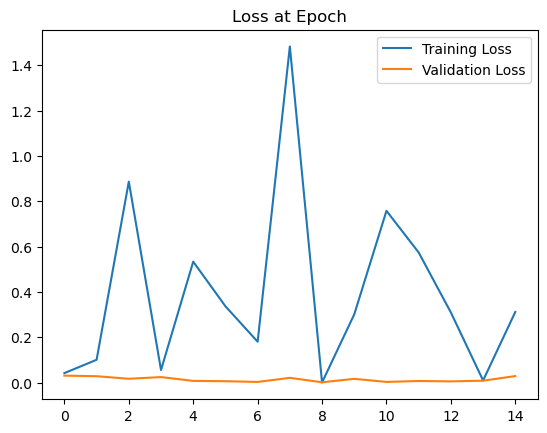

In [519]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

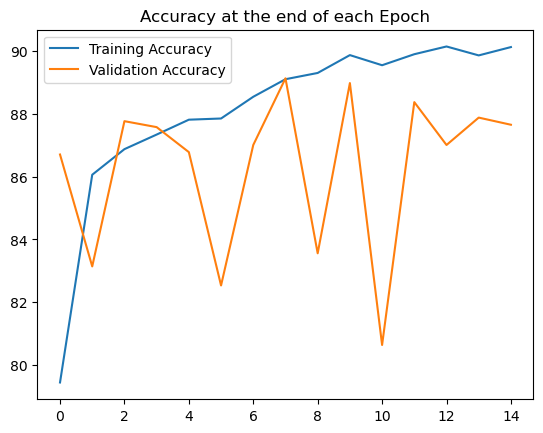

In [520]:
# graph the accuracy at the end of each epoch
plt.plot([(t/n)*100 for t,n in zip(train_correct, num_total_train)], label="Training Accuracy")
plt.plot([(t/n)*100 for t,n in zip(test_correct, num_total_test)], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [521]:
y_val2 = torch.max(y_val, 1)
y_val2.indices.numpy()

array([1, 1, 1], dtype=int64)

In [522]:
print(classification_report(y_test.numpy(),y_val2.indices.numpy()))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [523]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [524]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_everything:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [525]:
correct.item()

2308

In [526]:
correct.item()/len(test_data)*100

87.65666540068364

In [457]:
print(classification_report(y_test.numpy(),(torch.max(y_val,1)).indices.numpy()))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1895
           1       0.89      0.65      0.75       738

    accuracy                           0.88      2633
   macro avg       0.88      0.81      0.83      2633
weighted avg       0.88      0.88      0.87      2633



In [529]:
torch.save(model.state_dict(), "E:\CS projects\Smile Detection\model_1.pt")

In [618]:
final_test_data = []
for imagePath in sorted(list(paths.list_images("E:\CS projects\Smile Detection\Test"))):
    image = cv2.imread(imagePath)                    #Load the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #Convert image to grayscale
    image = imutils.resize(image, width=28)          #Resize image to a fixed size of 28x28 pixels
    image = convert_tensor(image)                    #Check WHAT THIS IS???
    #image = image/255                               # scale the raw pixel intensities to the range [0, 1]
    final_test_data.append(image)

In [646]:
img_num = 11

Smiling


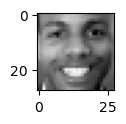

In [647]:
with torch.no_grad():
    final_y_val = model(final_test_data[img_num].reshape(1,1,-1,28))
    final_predicted = torch.max(final_y_val, 1)[1]
fig = plt.figure(figsize=(1, 1))
plt.imshow(final_test_data[img_num].reshape(-1,28), cmap='gray')
print("Smiling" if final_predicted==1 else "not smiling")

tensor([0])

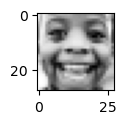

In [622]:
fig = plt.figure(figsize=(1, 1))
plt.imshow(final_test_data[5].reshape(-1,28), cmap='gray')